In [17]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

In [18]:
df = pd.read_csv('Breast_cancer_dataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df = df.drop(columns=['Unnamed: 32'])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Splitting Dataset into Feature Metrics and Target Vector**

In [20]:
X = df.drop(columns=['id', 'diagnosis'])
y = LabelEncoder().fit_transform(df['diagnosis'])

**Splitting Dataset into Training and Testing data**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Building the Model**

In [23]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Get Permutation Importance on the test set
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
# Put result into a DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance':
    result.importances_mean,
    'std': result.importances_std
})
# Sort by Importance
importance_df = importance_df.set_index('Feature').sort_values(by='Importance', ascending=False)
five_features = (importance_df.head(4))
five_features

,Importance,std
Feature,,
concave points_worst,0.004196,0.012587
texture_worst,0.003497,0.003497
radius_mean,0.002098,0.003205
smoothness_worst,0.000699,0.002098


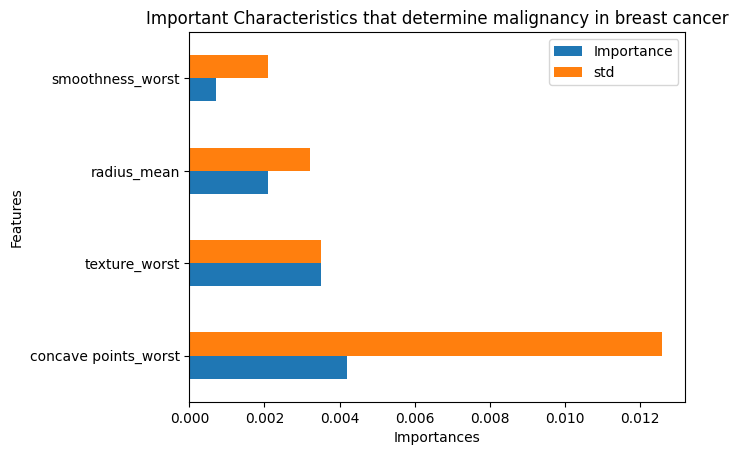

In [27]:
five_features.plot(kind='barh')
plt.xlabel('Importances'),
plt.ylabel('Features'),
plt.title('Important Characteristics that determine malignancy in breast cancer')
plt.show()

This bar chart displays the most important features that help determine malignancy in breast cancer, based on a model's analysis. The features are ranked by their importance scores (in blue), with standard deviation (in orange) also shown to indicate variability. From the visualization, '**concave points worst**' stands out as the most influential feature, followed by '**texture worst**', '**radius mean**', and '**smoothness worst**'. This suggests that abnomalities in the shape and texture of the tumor, especially in their worst states, are strong indicators of malignancy.